In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as cp
from CoolProp.CoolProp import PropsSI
from scipy.optimize import root


# Midterm

## Problem 1.1 Redlich Kwong cp and Tp

These conditions lead to 3 equations:

Redlich Kwong

$$P=\frac{R T}{v-b}-\frac{a}{\sqrt{T}v(v+b)}=\frac{R T}{v-b}-\frac{a}{\sqrt{T}\left({ }v^{2}+b v\right)}$$

$$\frac{d}{d v} \frac{1}{v^{2}+b v}=-\frac{2 v+b}{\left(v^{2}+b v\right)^{2}}$$

$$\frac{\partial p}{\partial v}=-\frac{R T}{(v-b)^{2}}+\frac{a(2 v+b)}{\sqrt{T}\left(v^{2}+b v\right)^{2}}$$

$$\begin{aligned}
\frac{\partial^{2} p}{\partial v}&=+\frac{2 R T}{(v-b)^{3}}+\frac{a}{\sqrt{T}} \frac{\left(v^{2}+b v\right)^{2} 2-(2 v+b)^{2} 2\left(v^{2}+b v\right)(2)}{\left(v^{2}+b v\right)^{4}}\\
&=\frac{2 R T}{(v-b)^{3}}+\frac{a}{\sqrt{T}} \frac{2\left(v^{2}+b v\right)-2(2 v+b)^{2}}{\left(v^{2}+b v\right)^{3}}\\
&=\frac{2 R T}{(v-b)^{3}}+\frac{a}{\sqrt{T}} \frac{2 v^{2}+2 b v-8 v^{2}-8 v b-2 b^{2}}{\left(v^{2}+6 v\right)^{3}}\\
&=\frac{2 R T}{(v-b)^{3}}-\frac{a}{\sqrt{T}} \frac{6 v^{2}+6 b v+2 b^{2}}{\left(v^{2}+b v\right)^{3}}
\end{aligned}$$


At $v=v_{c}, T=T_{c}$,

$$
\begin{aligned}
&\left.\frac{\partial P}{\partial v}\right|_{T}=0 \Rightarrow \frac{R T_{c}}{\left(v_{c}-b\right)^{2}}=\frac{a\left(2 v_{c}+b\right)}{\sqrt{T}\left(v_{c}^{2}+b v_{c}\right)^{2}} \\
&\left.\frac{\partial^{2} P}{\partial v^{2}}\right|_{T}=0 \Rightarrow \frac{2 R T_{c}}{\left(v_{c}-b\right)^{3}}=\frac{a}{\sqrt{T}} \frac{6 v^{2}+6 b v+2 b^{2}}{\left(v^{2}+b v)^{3}\right.}
\end{aligned}
$$

$$\frac{v_{c}-b}{2}=\frac{\left(v_{c}^{2}+bv_{c}\right)\left(2 v_{c}+b\right)}{6 v^{2}+6 bv+2 b^{2}}$$

This page gets me a function of just b and $v_c$:
$$
\begin{equation}
\begin{array}{rl}
\left(6 v^{2}+6 b v+2 b^{2} \right) (v-b) & =2\left(v^{2}+b v\right)(2 v+b) \\
& =\left(2 v^{2}+2 b v\right)(2 v+b) \\
6 v^{3}+6 b v^{2}+2 b^{2} v -6 b v^{2}-6 b^{2} v-2 b^{3} & =4 v^{3}+4 b v^{2}+2 bv^{2}+2 b^{2} v \\
2 v^{3}-6 b v^{2}-6 b^{2} v-2 b^{3} & =0 . \\
2\left(v^{3}-3 b v^{2}-3 b^{2} v-b^{3}\right) & =0
\end{array}
\end{equation}
$$


Now I check that $v_c = \frac{b}{2^{1/3}-1}$ factors into the equation above

$$\begin{aligned}
&\frac{b^{3}}{\left(2 ^\frac{1}{3}-1\right)^{3}}-\frac{3 b^{3}}{\left(2 ^\frac{1}{3}-1\right)^{2}}-\frac{3 b^{3}}{2 ^\frac{1}{3}-1}-b^{3}\\
&\frac{b^{3}-3 b^{3}\left(2^{\frac{1}{3}}-1\right)-3 b^{3}\left(2 \frac{1}{3}-1\right)^{2}-b^{3}\left(2 ^\frac{1}{3}-1\right)^{3}}{\left (2^{\frac{1}{3}}-1)^{3}\right.}\\
&\frac{b^{3}\left(-\left(2^{\frac{1}{3}}-1\right)^{3}-3\left(2 ^\frac{1}{3}-1\right)^{2}-3\left(2^{\frac{1}{3}}-1\right)+1\right)}{2-2^{\frac{2}{3}}+2^{\frac{1}{3}}-1} =0
\end{aligned}$$

so it factors  and $v_c = \frac{b}{2^{1/3}-1}$ is a root.

This proves $\frac{p_cv_c}{RT_c} = 1/3$, verified by doing the calculation below:

$$
\begin{equation}
\begin{aligned}
&\frac{p_{c} v_{c}}{R T_{c}}=\frac{1}{3} ?\\
\quad \text { Let } 2^{\frac{1}{3}}-1=\beta\\
&v_{c}=\frac{b}{2^{\frac{1}{3}-1}}=\frac{b}{\beta}\\ 
&\beta v_{c}=b .\\
\text { (1)}&P_{c}=\frac{R T}{v-b}-\frac{a}{\sqrt{T} v(v+b)}=\frac{R T}{(1-\beta)v}-\frac{a}{\sqrt{T} v^{2}(1+\beta)}\\
\text { (2) For } &\frac{\partial p}{\partial v}=0,\quad \frac{R T}{\left(v_{c}-b\right)^{2}}
=\frac{a\left(2 v_{c}+b\right)}{\sqrt{T}\left(v_{c}{ }^{2}+b v_{c}\right)^{2}}=\\
&\frac{R T_{c}}{(1-\beta)^{2} v_{c}^{2}}=\frac{a(2+B) v_{c}}{\sqrt{T}\left(v_{c}^{2}(1+\beta)\right)^{2}.}\\
&R T_{c}^{3 / 2}=\frac{a(2+\beta) (1-\beta)^{2}}{v_{c}(1+\beta)^{2}} \Rightarrow \frac{a}{\sqrt{T} v_{c}^{2}(1+\beta)}=\frac{R T(1+\beta)}{(2+\beta)(1-\beta)^2}\\
\text { (1) +(2) } &p_{c}=\frac{R T_{c}}{(1-\beta) v_{c}}-\frac{R T_{c} (1+\beta)}
{v_{c}(2+\beta)(1-\beta)^{2}}\\
&\rightarrow \frac{P_c v_{c}}{R_{T_{c}}}=\frac{1}{(1-\beta)}-\frac{1}{(2+\beta)(1+\beta)^{2}}
\end{aligned}
\end{equation}
$$

In [2]:
beta = 2**(1/3)-1
1/(1-beta) - (1+beta)/((2+beta)*(1-beta)**2)

0.3333333333333335

This gives me $a = A\frac{R^2 T_c^{5/2}}{p_c}$, which I verify works below in code.

$$
\begin{equation}
\begin{aligned}
&a=-\left(p-\frac{R_{T}}{v_{c}-b}\right) \sqrt{T} \quad v_{c}\left(v_{c}+b\right)\\
&\text { Since } v_{c}^{2}=\frac{R^{2} T_{c}^{2}}{9 p_{c}^{2}}\\
&a=-\left(p-\frac{RT}{v_{c}-b}\right) v_{c}^{2}(1+\beta) \sqrt{T}\\
&=-\left(p-\frac{RT}{v_c \cdot(1-\beta)}\right) \frac{R^{2} T_{c}^{2}}{a p_{c}^{2}}(1+\beta)\\
&=-\left(p-\frac{3 p_{c}}{1-\beta}\right) \frac{R^{2} T_{c}^{5 / 2}}{9 p_{c}^{2}}(1+\beta)\\
&\frac{-\left(1-\frac{3}{1-\beta}\right)(1+\beta)}{9} \frac{R^{2} T_{c}{ }^{5 / 2}}{p_{c}}\\
&-\frac{R^{2} T_{c}^\frac{5}{2}}{p_{c}} \frac{2^{\frac{1}{3}}}{9}\left(\frac{1-\beta-3}{1-\beta}\right)\\
&=0.4275 \frac{R^{2} T_{c}}{p_{c}}
\end{aligned}
\end{equation}
$$

In [3]:
# A 
-(beta +1)*(1-3/(1-beta))/9 

0.42748023354034137


It is straightforward to get b.

$v_{c}=\frac{b}{2^{\frac{1}{3}}-1}=\frac{R T_{c}}{3 P_{c}}$

$$
\begin{aligned}
&v_{c}=\frac{b}{2^{\frac{1}{3}}-1}=\frac{R T_{c}}{3 P_{c}} \\
&b=\frac{2^{\frac{1}{3}}-1}{3} \frac{RT_c}{P_{c}}= \beta \frac{R{T_{c}}}{P_{c}}
\end{aligned}
$$

## Problem 1 Part 2 - Non-Dimensionalize


To get pr:
$$
\begin{aligned}
&P=\frac{R T}{V-b}-\frac{a}{\sqrt{T} v(v+b)}\\
&\frac{P}{P_{c}} P_{c}=\frac{R T}{v-b}-\frac{a}{\sqrt{T} v(v+b)}\\
&\frac{P}{P_{c}} P_c = \frac{\frac{RT}{R{T_{c}}} R{T_{c}}}{\frac{v}{v_c}{v_{c}-b}}-\frac{a}{\frac{\sqrt{T}}{\sqrt{T_{c}}} \sqrt{T_{c}}} \frac{v v_{c}}{v_{c}}\left(\frac{v}{v_{c}} v_{c}+b{}\right)\\
&p_r p_{c}=\frac{T_{r} R T_{c}}{v_r v_{c}-b}-\frac{a}{\sqrt{T_{r}} T_{c}\left(v_{r}\right. v_{c}\left(v_{r} v_{c}+b\right)}\\
&=\frac{3 T_{r} P_{c} V_{c}}{v_{r}\left(v_{c}\right)-\frac{B RT_{c}}{p_{c}}}-\frac{a}{\sqrt{T_{r}} v_r\sqrt{ T_{c}} v_{c}\left(v_{r} v_{c}+b\right)}\\
&p_rp_{c}=\frac{3 T_{r} P_{c}}{v_{1}-3B}-  \frac{3}{\sqrt{T_r v_{r}}} \frac{R T_{c} A}{\left(v_{r} v_{c}+b\right)}\\
&p_rp_{c}=\frac{3 T_{r} P_{c}}{v_{1}-3B}-  \frac{3}{\sqrt{T_r v_{r}}} \frac{3p_cv_c A}{\left(v_{r} v_{c}+3Bv_c\right)}
\end{aligned}
$$

$$
\begin{aligned}
&p_rp_c=\frac{3 T_rp_c}{v_{r}-3 B}-\frac{9 p_c A}{\sqrt{T_{r}} v_{r}\left(v_{r}+3B\right)}\\
&p_r=\frac{3 T_r}{v_{r}-3 B}-\frac{9 A}{\sqrt{T_{r}} v_{r}\left(v_{r}+3B\right)}
\end{aligned}$$

This gives me Z:

$$
\begin{aligned}
&Z=\frac{P V}{RT}= \frac{\frac{pv}{p_cv_c}{p_cv_c}}{R\frac{T}{T_c}T_c}=\frac{p_r v _r}{3 T_r}\\
&=p_r=\frac{3 v_r}{3 (v_{r}-3 B)}-\frac{9 A}{\sqrt{T_{r}} 3T_r\left(v_{r}+3B\right)} \\ 
&= \frac{v_r}{v_r - 3B} - \frac{3 A}{T_{r}^{3/2} \left(v_{r}+3B\right)} 
\end{aligned}$$

## Problem 1 Part 3

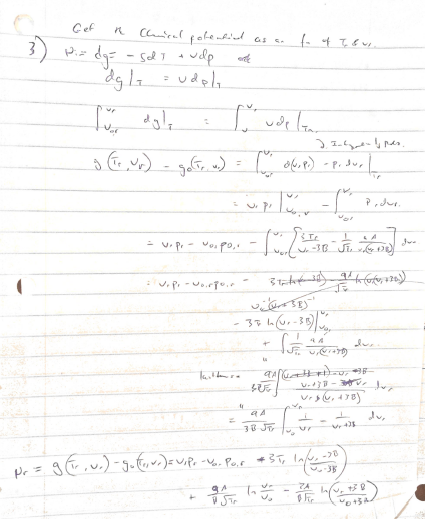


I'll plot it below for good measure

In [4]:
A = 0.4275  # Page 253, Bejan
B = 0.08664

def Pr(vr, Tr):
    return 3*Tr/(vr-(3*B)) - (9*A / (Tr**.5 * vr*(vr+3*B)))

In [5]:
# Part e is Lecture 7
Tr = .8 # Arbitrary
vr = np.linspace(0.33,20,1000)
pr = Pr(vr, Tr) # Array of pressures given the temperature
mur =   vr*pr - vr[-1]*pr[-1] - \
        3 *Tr * np.log ((vr-3*B)/(vr[-1]-3*B)) + \
        3*A/(B*Tr**.5)*np.log(vr/vr[-1]) - \
        3*A/(B*Tr**.5)*np.log((vr+3*B)/(vr[-1]+3*B))

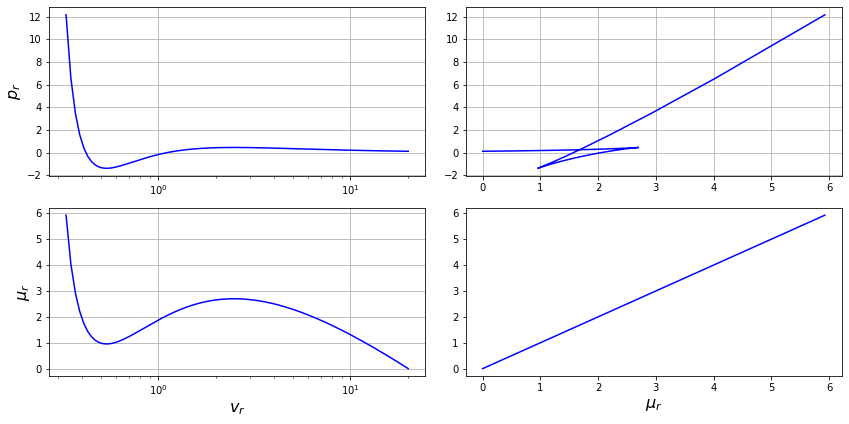

In [6]:
f, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,6))
ax1.plot(vr,pr, 'b') # pr vs vr
ax2.plot(mur, pr, 'b') # mur (difference in gibbs free energy) vs pr
ax3.plot(vr, mur, 'b') # 
ax4.plot(mur, mur, 'b')
ax3.set_xlabel(r'$v_r$', fontsize=16)
ax4.set_xlabel(r'$\mu_r$', fontsize=16)
ax1.set_ylabel(r'$p_r$', fontsize=16)
ax1.set_xscale('log')
ax3.set_xscale('log')
ax3.set_ylabel(r'$\mu_r$', fontsize=16)
plt.tight_layout()
ax3.grid(True)
ax2.grid(True)
ax1.grid(True)
# ax1.set_ylim([0,8])
# ax2.set_ylim([0,8])

## Problem 1 Part 4 - pr-vr diagram

##### Problem 1 Part 5
Write a Python function to determine the dependence of saturation pressure, $p_{sat,r}$
on $T_r$. Identify the specific volumes corresponding to the saturated liquid and
vapor states. Show the isotherms with the phase change included on the pr - vr
diagram. You may have to identify the spinodal curve in order to determine the
vapor pressure curve.

From Lecture 7 there are notes
1. Pick Tr
1. Guess $V_{ar_f}$, and $V_{ar_g}$
1. Check if these two equations hold simultaneously
1. Keep refining until you get $V_{ar_f}$, and $V_{ar_g}$ within a tolerance
1. this gives p_{sat,r}(Tr)

In [8]:
Tr = .9
Varf1 = 0.5
Varg1 = 3

Pr(Varf1,Tr) - Pr(Varg1,Tr)

# Part e is Lecture 7
vr = np.linspace(0.33,10,1000)
pr = Pr(vr, Tr) # Array of pressures given the temperature
vr0 = vr[-1]
pr0 = pr[-1]

def Mur(vrr,Tr):
    pr = Pr(vrr,Tr)
    return vrr*pr - vr0*pr0 - \
        3 *Tr * np.log ((vrr-3*B)/(vr0-3*B)) + \
        3*A/(B*Tr**.5)*np.log(vrr/vr0) - \
        3*A/(B*Tr**.5)*np.log((vrr+3*B)/(vr0+3*B))
def compOutput(x, Tr):
    '''
    x := h3,h4,h5,h8,h9,h10 
    '''
    varf = x[0]
    varg = x[1]    
    equal_pressure = Pr(varf,Tr) / Pr(varg,Tr)-1
    equal_potential = Mur(varf,Tr) / Mur(varg,Tr) - 1

    return equal_pressure, equal_potential
results = root(compOutput, x0 = np.hstack((Varf1,Varg1),), args = Tr)
results

    fjac: array([[-0.99547609, -0.09501238],
       [ 0.09501238, -0.99547609]])
     fun: array([5.33528777e-12, 8.61057892e-11])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.73438003e-09, 4.23847008e-09])
       r: array([20.11536727, -0.18061203, -0.14450087])
  status: 1
 success: True
       x: array([0.50311367, 3.35673797])

    fjac: array([[-0.99973063, -0.02320918],
       [ 0.02320918, -0.99973063]])
     fun: array([-4.74065232e-14, -1.80966353e-14])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([2.38000714e-10, 9.99589908e-11])
       r: array([ 2.83142146, -0.2138835 , -0.1204375 ])
  status: 1
 success: True
       x: array([0.5949155 , 2.15416394])


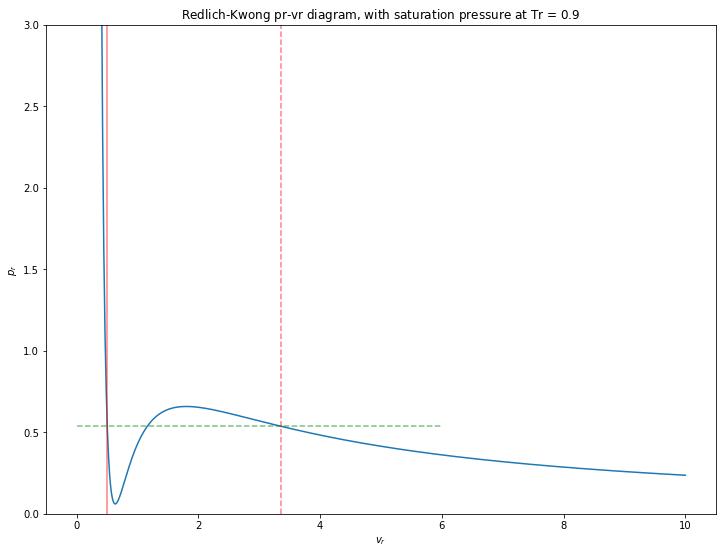

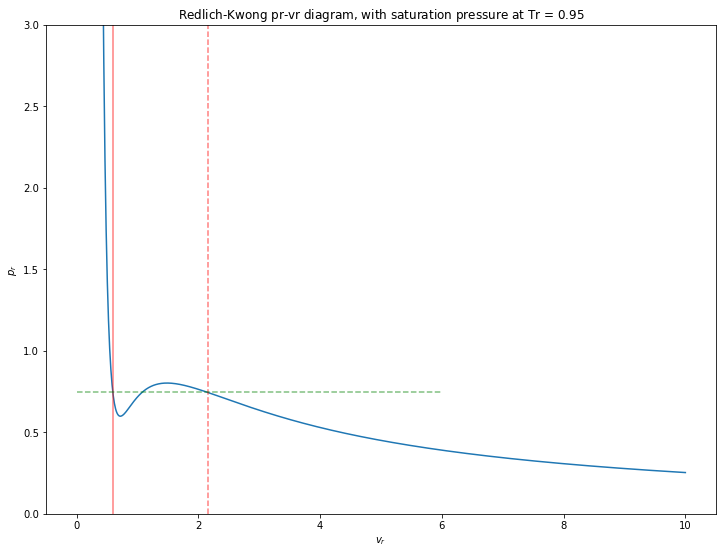

In [9]:
vr = np.linspace(0.33,10,1000)
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1)
plt.plot(vr, Pr(vr,Tr))
# ax.set_xscale('log')
plt.ylim(0,3)
plt.title("Redlich-Kwong pr-vr diagram, with saturation pressure at Tr = ${}$".format(Tr))
plt.xlabel("$v_r$")
plt.ylabel("$p_r$")
plt.vlines(results.x[0],0,6, color = 'r', linestyles = 'solid', alpha = 0.5, label = 'saturated liquid specific volume')
plt.vlines(results.x[1],0,6, color = 'r', linestyles = 'dashed', alpha = 0.5, label = 'saturated vapor specific volume')
plt.hlines(Pr(results.x[0],Tr),0, 6, color = 'green', linestyles = 'dashed', alpha = 0.5, label = 'saturation pressure')

Tr = .95
results = root(compOutput, x0 = np.hstack((Varf1,Varg1),), args = Tr)
vr = np.linspace(0.33,10,1000)
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1)
plt.plot(vr, Pr(vr,Tr))
# ax.set_xscale('log')
plt.ylim(0,3)
plt.title("Redlich-Kwong pr-vr diagram, with saturation pressure at Tr = ${}$".format(Tr))
plt.xlabel("$v_r$")
plt.ylabel("$p_r$")
print(results)
plt.vlines(results.x[0],0,6, color = 'r', linestyles = 'solid', alpha = 0.5, label = 'saturated liquid specific volume')
plt.vlines(results.x[1],0,6, color = 'r', linestyles = 'dashed', alpha = 0.5, label = 'saturated vapor specific volume')
plt.hlines(Pr(results.x[0],Tr),0, 6, color = 'green', linestyles = 'dashed', alpha = 0.5, label = 'saturation pressure')

## Problem 1 Part 6

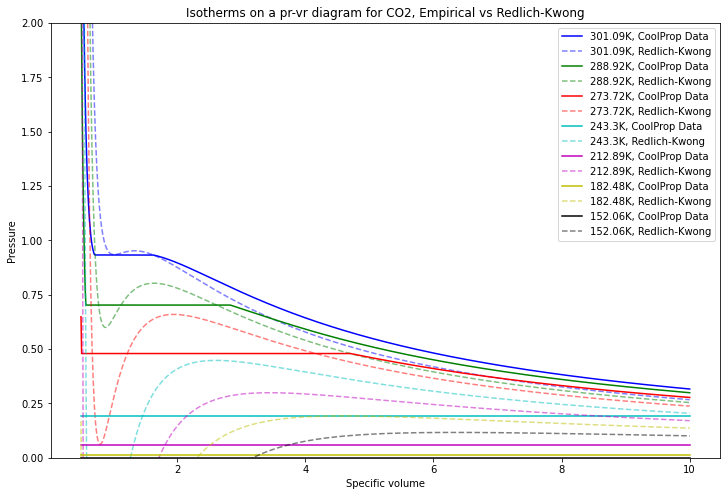

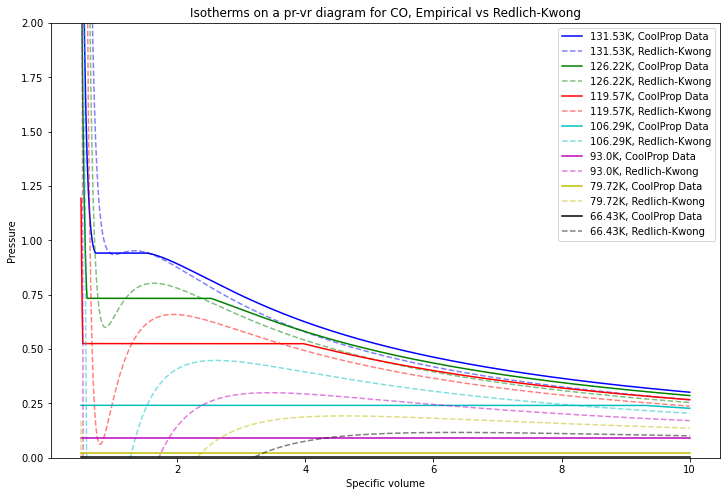

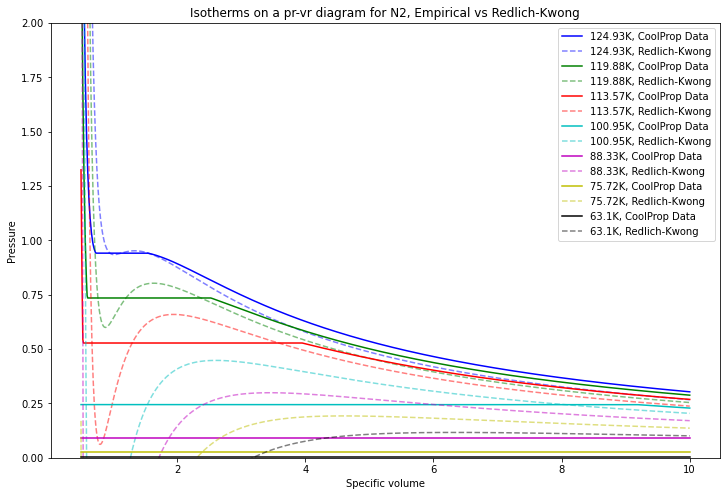

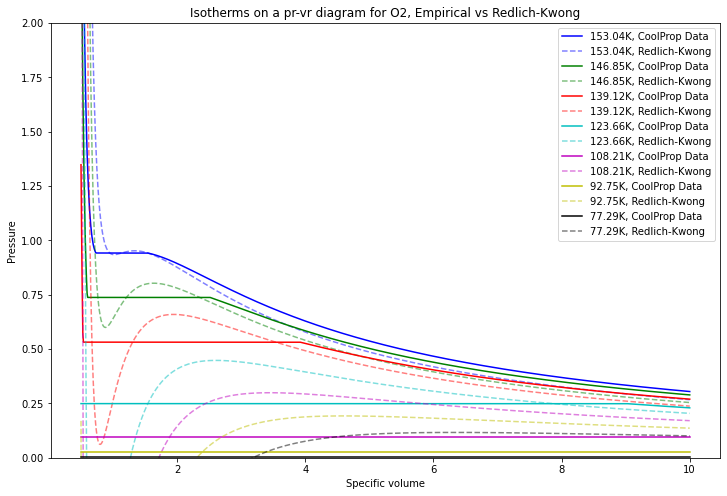

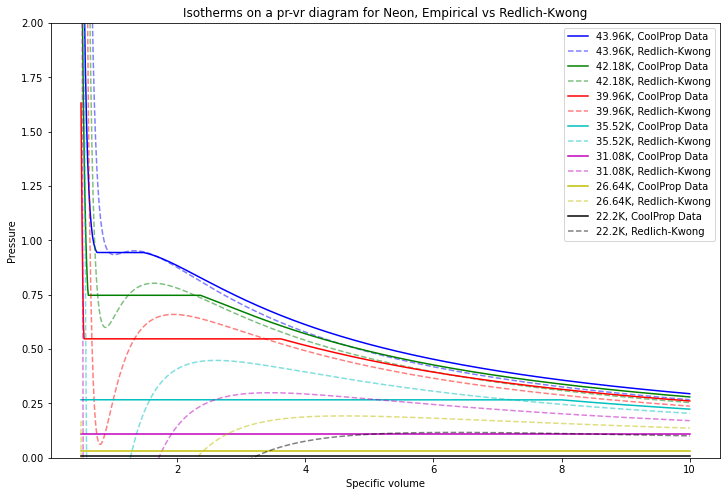

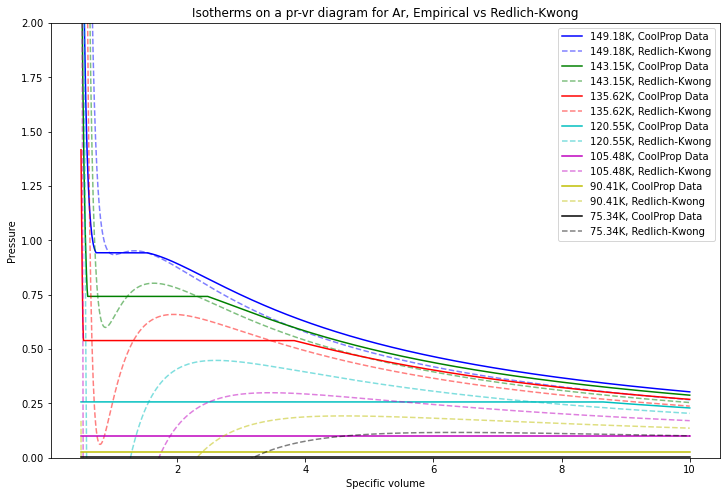

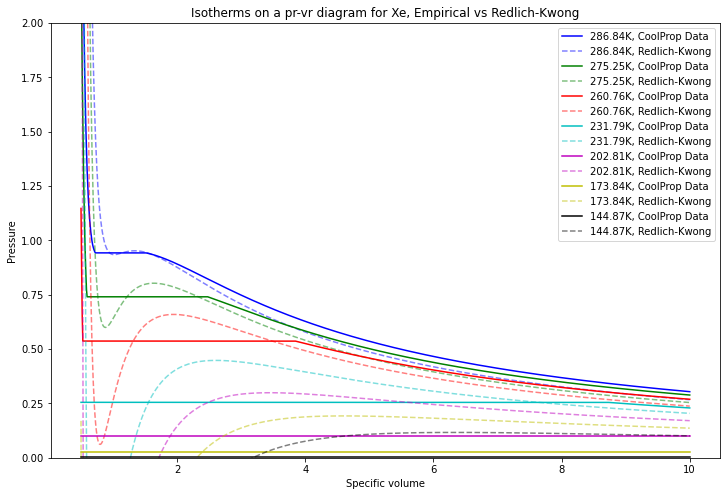

In [10]:
mats = ['CO2', 'CO','N2','O2','Neon','Ar','Xe']
for mat in mats:
    colors = ['b','g','r','c','m','y','k']
    Pc = PropsSI('Pcrit', mat )
    Tc = PropsSI('Tcrit', mat)
    rhoc = PropsSI('rhocrit', mat)
    vc = 1/rhoc
    Trs = np.array([0.99, 0.95, 0.9, 0.8, 0.7, .6, .5])
    vrs = np.linspace(0.5,10,1000)
    Tarray = Tc*Trs # Tr* Tc
    varray = vc*vrs
    Prarray = np.vstack([Pr(vr,Tr) for Tr in Trs])

    f, ax1 = plt.subplots(1, figsize = (12,8))
    plt.title("Isotherms on a pr-vr diagram for {}, Empirical vs Redlich-Kwong".format(mat))

    for i in range(len(Tarray)):
        T = Tarray[i]
        # Plot the CoolProp version
        parray = PropsSI('P', 'T', T, 'DMASS', 1/varray, mat)
        ax1.plot(varray/vc, parray/Pc, label=str(np.round(T,2))+ 'K, CoolProp Data', color = colors[i])
        # Plot the Redlich Kwong version
        ax1.plot(varray/vc, Prarray[i], label=str(np.round(T,2)) + 'K, Redlich-Kwong', linestyle= 'dashed', alpha = 0.5, color = colors[i])     
        
    ax1.set_xlabel('Specific volume')
    ax1.set_ylabel('Pressure')
    ax1.legend(loc='upper right')
    ax1.set_ylim([0,2])

## Problem 1 Part 7

The acentric factor for a Redlich Kwong fluid is 

$$\omega = -1 - log_{10} p_{sat,r} (Tr = 0.7)$$

In [11]:
Tr = 0.7
results = root(compOutput, x0 = np.hstack((Varf1,Varg1),), args = Tr)
omega = -1-np.log(Pr(results.x[0],Tr))
omega

0.2063650211651853

# Problem 2

I didn't manage to get any further than this:


$$\begin{aligned}
&\text{Exergy} =U(T, p)-T_{0} S(T, p) + p_0 \cdot v(T, p) - U(T_0, p_0)-T_{0} S(T_0, p_0) + p_0 \cdot v(T_0, p_0)\\
&\text { Since } U(T, p) = TS - pV + \sum \mu_i N_i \\
&U(T, p)-U(T_{0}, T_{0}) = TS- pV + \sum \mu_i N_i - T_0 S_0 - p_0 V_0 - \sum \mu_{0i} N_{io}\\
&\text { Then exergy } =T_{S}-T_{0} S(T,p)+T_{0} S(T_{0}, p_{0})-T_{0})S(T_{0},p_{0})-pV+p_{0} V_{0}+p_{0} V-p_{0} V_{0} + \sum \mu_i N_i - \sum \mu_{0i} N_{io}\\
&=TS  (T \cdot p)+ T_{0} S(T, p)-p V(T,p)+p_{0} V(T, p)+ \sum \mu_i N_i - \sum \mu_{0i} N_{io}\\
&=\left(T-T_{0}\right) S(T, p)-\left(p-p_{0}\right) V(T, p)+\sum \mu_i N_i - \sum \mu_{0i} N_{io}
\end{aligned}$$

# Problem 3
Let $\dot C (\dot A_p, \varepsilon) =$ Total cost.
$$\begin{aligned}
\dot C (\dot A_p, \varepsilon) &=c_{f} \dot A_{f}+\dot C_{nf}=k+K\left(\frac{\varepsilon}{1-\epsilon}\right) \dot A_{p}\\
&=c_{f} \frac{\dot A_{p}}{\varepsilon}+k+K\left(\frac{\varepsilon}{1-\varepsilon}\right) \dot A_p\\ 
\frac{\partial \dot C}{\partial \varepsilon} &=-c_{f} \dot A_{p} \varepsilon^{-2}+ k \dot{A}_{p} \frac{1-\varepsilon+\varepsilon}{(1-\varepsilon)^{2}} =0\\
\frac{\partial \dot C}{\partial \varepsilon} &=-c_{f} \dot A_{p} \varepsilon^{-2}+ k \dot{A}_{p} \frac{1}{(1-\varepsilon)^{2}} =0\\
c_{f} \dot A_{p}(1-\varepsilon)^{2}&=k \dot A_{p} \varepsilon^{2}\\
c_{f} \dot A_{p}\left(1-2\varepsilon+\varepsilon^{2}\right)&=k \dot A_{p} \varepsilon^{2} .
\end{aligned}
$$


$$
\begin{aligned}
&\left(k-c_{f}\right) \varepsilon^{2}+2 c_{f} \varepsilon-c_{f}=0 \text {. }\\
\text { If } c_{f}>0 &\text {,}\\
& \varepsilon = \frac{-b \pm \sqrt{b^2-4ac}}{2a} =\\
&=\frac{-2 c_{f}+2 \sqrt{c_{f}^{2}+kc_f-c_{t}^{2}}}{2\left(k-c_{f}\right)}\\
&\varepsilon=\frac{-2 c_f+2 \sqrt{k c_f}}{2(k-c_f}
\end{aligned}$$